# `Linear Regression on images Tutorial`
by Dominic Waithe (c) 2020
### Introduction
* This notebook covers different code implementations from the scikit learn and pandas library, including:
  * Importing image data
  * Recaling and Standardizing Data 
  * Linear regression
  * Residuals
  * Plotting 

### Approach and Exercises
* Each section will help reinforce your learning. We suggest you:
    * Read each cell before you run it.
    * Ponder the meaning and function of all the commands.
    * Try altering some of the code to see what happens.
   

## 1. Tutorial set up 
* Import statements
* Loading the datasets
* Reviewing the ML problem

In [136]:
# import statements 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# we will generally import scikit learn libraries when the are required, so you understand which specifc libraries are required 

In [5]:
#Files download, you should only need to do this once.
import requests, zipfile, io
zip_file_url = "http://sara.molbiol.ox.ac.uk/dwaithe/files/fluoCells.zip"
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()
#It will download the data form the server, and unzip in the directory where you run your notebook from.

Text(0.5, 1.0, 'Ground-truth image')

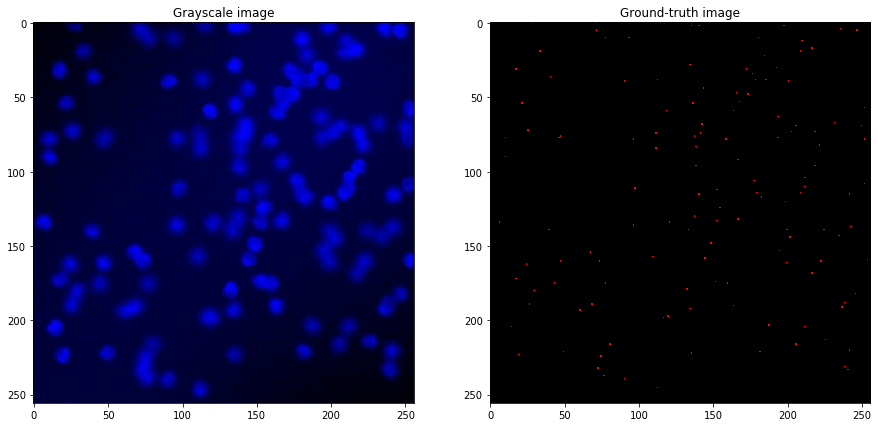

In [109]:
fig,pane =plt.subplots(1,2,figsize=(15,15))
img = plt.imread('fluoCells/001cell.png')#Reads the image in.
gti = plt.imread('fluoCells/001dots.png')#Reads the ground-truth image in.
pane[0].imshow(img)#plots image to left pane
pane[1].imshow(gti)#plots image to right pane.
pane[0].set_title('Grayscale image')
pane[1].set_title('Ground-truth image')


 * We have a number of images (200) with matching ground-truth images.  
 * In future we want to be able to predict number of cells in image, without having to make ground-truth. 
 * Can we learn the relationship between these images and their ground-truths and predict the cell counts?

In [110]:
#Lets import the images and make a dataframe for the data
name_array = []
gray_intensity = []
gt_count = []
for i in range(0,200):
    n = str(i+1).zfill(3)
    name_array.append(n+"cell")
    img = plt.imread("fluoCells/"+n+"cell.png")#Reads the image in.
    gti = plt.imread("fluoCells/"+n+"dots.png")
    gray_intensity.append(np.sum(img))
    gt_count.append(np.sum(gti))

#print and example
data = pd.DataFrame(list(zip(gray_intensity,gt_count)),columns=['gray_intensity','ground-truth'],index=name_array)
data.head()


,gray_intensity,ground-truth
001cell,20235.419922,135.0
002cell,27686.384766,233.0
003cell,15349.925781,82.0
004cell,15350.378906,86.0
005cell,16923.193359,96.0


has a high degree of correlation 0.9912566989929834


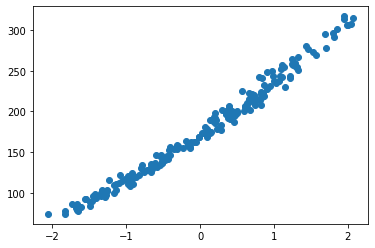

In [106]:
#Lets the plot the relationship between our X and y
plt.plot(sta_X,y,'o')
print('has a high degree of correlation',np.corrcoef(sta_X,y)[1][0])
#But is not perfect and so we can use linear regression, its not deterministic.

## 2. Data processing
* Scale data
* Generate training/test data
* Fit data to model

In [154]:
#Extract our training pairs.
y = data['ground-truth']
X = np.array(data['gray_intensity']).reshape(-1, 1)

# Rescaling and Standardizing Data 
# Machine Learning algorithms can receive perform benefits from data that has been rescaled and standardized, either in terms of speed or accuracy, or both.
# There are a number of different ways of doing this, and implementations may vary because of algorithm requirements or personal preference.
# This can be done easily using the pandas framework.
# Create scaler object:
scaler = StandardScaler()
# fit the scaler - this calculates the mean and std of the data.
scaler.fit(X)
# transform the data using the fitted scaler - this applies the transform using the fit
sta_X = scaler.transform(X)

print('mean',np.round(np.mean(sta_X),0))
print('std',np.std(sta_X))

mean -0.0
std 1.0


In [155]:
X_train, X_test, y_train, y_test = train_test_split(sta_X,y, test_size=0.3, random_state=1)


In [168]:
#This is our sanity check. Our method should beat this.
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
y_prob = dummy_regr.predict(X_test)
print('Dummy regressor:')
print('Mean Squared Error (the lower the better)',mean_squared_error(y_test,y_prob))

#This is our linear regression model.
linear = LinearRegression()
linear.fit(X_train,y_train)
y_pred = linear.predict(X_test)
print('Linear regressor:')
print('Mean Squared Error (the lower the better)',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error (average error per point)',np.sqrt(mean_squared_error(y_test,y_pred)))

Dummy regressor:
Mean Squared Error (the lower the better) 4298.9800000000005
Linear regressor:
Mean Squared Error (the lower the better) 68.10693810896474
Root Mean Squared Error (average error per point) 8.252692779266942


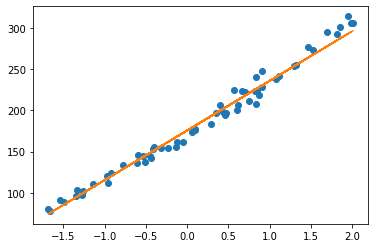

In [157]:
#Lets plot our line.
M = linear.coef_ #This is how we extract our parameters (M, the gradient of the fit line).
c = linear.intercept_ #This is how we extract our parameters (c, the y_intercept of the  fit line).
plt.plot(X_test,y_test,'o')
plt.plot(X_test,M*X_test+c,'-')

In [178]:
#Lets plot it has a nice table

pred_data = pd.DataFrame(list(zip(y_test,y_pred,y_test-y_pred)),index=y_test.index,columns=['ground-truth','prediction','difference'])
pred_data.head()
#Notice the diff. This is our residuals

,ground-truth,prediction,difference
059cell,103.0,95.504192,7.495808
041cell,223.0,226.902792,-3.902792
035cell,142.0,149.438922,-7.438922
103cell,254.0,253.859660,0.140340
185cell,248.0,230.194033,17.805967


Text(0, 0.5, 'Error')

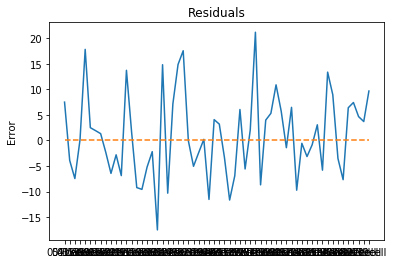

In [231]:
#Now lets plot the residuals
plt.plot(pred_data['difference'])
plt.plot(np.arange(0,pred_data.shape[0]),[0]*pred_data.shape[0],'--')
plt.title("Residuals")
plt.ylabel('Error')

### Non-linear data.
In this exercise we try and fit a straight-line to some data which does not strictly linear

In [237]:
#Here I just make up some data.
X_nonlin = np.arange(0,100)
y_nonlin = (X_nonlin*0.4 +(X_nonlin**2)*0.08 + 5)+(np.random.normal(size=100)-0.5)*15

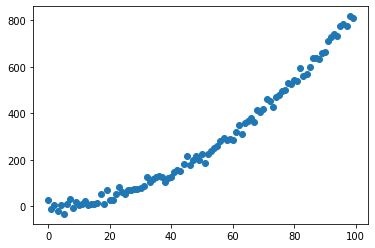

In [238]:
#plotting the data.
plt.plot(X_nonlin, y_nonlin,'o')

In [239]:
print('has a high degree of correlation',np.corrcoef(X_nonlin,y_nonlin)[1][0])
#This data is still highly correlated.
#TODO:
#Exercise. Fit this data with a linear regression model and then calculate the residuals.
#How do the residuals look? Can you see evidence of the non-linearity in the data.


has a high degree of correlation 0.9685379879917909


## 9. Review
* We have covered:
  * Scaling and Standardizing Data 
  * Regression machine learning algorithms
  * Model Evaluation and Metrics 
  * Regularization
  * Optimising parameters 
  * Ensemble models 
  * Building Pipelines
* We have of course not covered everything that it is possible to cover, and there is plenty more to research. 
* If you want to do more, you can do the advanced linear regression notebook  or....
* If you are really serious about doing image analysis with Python please check this site: https://github.com/IAFIG-RMS/Python-for-Bioimage-Analysis